In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# prompt: generate me code to import form drive

from google.colab import drive
drive.mount('/content/drive')

# Example: Import a CSV file
import pandas as pd
file_path = '/content/drive/MyDrive/Personal Projects /Edunet Internship/emails.csv'  # Replace with your file path
dataset= pd.read_csv(file_path)
print(dataset.head())

Mounted at /content/drive
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [4]:
dataset.shape

(5728, 2)

In [5]:
# Show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
# Show dataset statistics
dataset.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Data Visualization

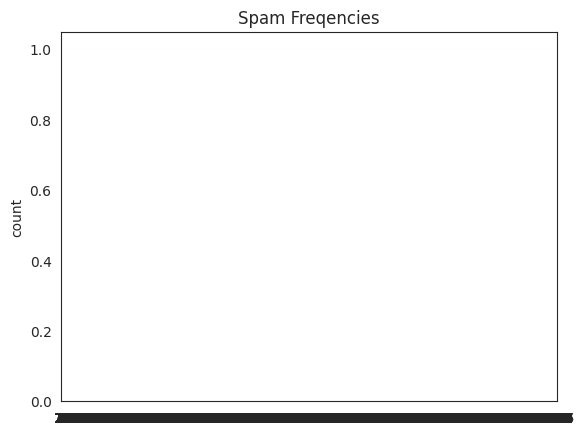

In [7]:
# Visualize spam  frequenices
plt.figure(dpi=100)
sns.countplot(dataset['spam'])
plt.title("Spam Freqencies")
plt.show()

# Data Cleaning

In [8]:
dataset.isnull().sum()

,0
text,0
spam,0


In [9]:
# Check for duplicates and remove them
dataset.drop_duplicates(inplace=True)

In [10]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# Fit the CountVectorizer to data
message = CountVectorizer(analyzer=process).fit_transform(dataset['text'])


# Data Splitting

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(message, dataset['spam'], test_size=0.20, random_state=0)

Model

In [12]:
# Model creation
model = MultinomialNB()

In [13]:
# Model training
model.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Model predictions on test set
y_pred = model.predict(X_test)

In [15]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

99.20983318700614

In [16]:
# Model Evaluation | Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       870\n           1       0.97      1.00      0.98       269\n\n    accuracy                           0.99      1139\n   macro avg       0.98      0.99      0.99      1139\nweighted avg       0.99      0.99      0.99      1139\n'

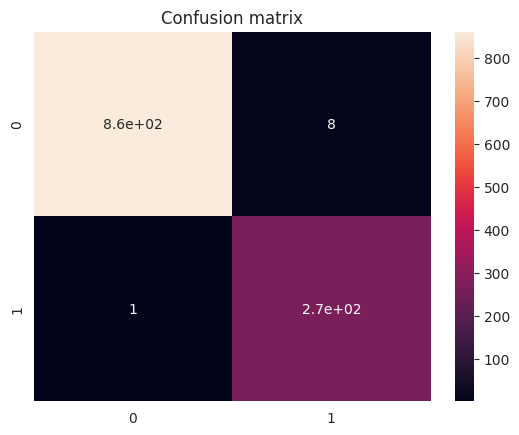

In [17]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [18]:
import pickle

# Save the trained model
with open('spam_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open('count_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(CountVectorizer(analyzer=process), vectorizer_file)


In [21]:
# prompt: make a ml pipeline for the above

import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Assuming 'dataset' and 'process' function are defined as in the previous code

# Create a pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=process)),
    ('classifier', MultinomialNB())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['spam'], test_size=0.20, random_state=0)


# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
filename = 'spam_detection_pipeline.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

# Load the pipeline (example)
loaded_pipeline = pickle.load(open(filename, 'rb'))

# Make predictions (example)
predictions = loaded_pipeline.predict(X_test)

# ... (rest of your evaluation code)

In [22]:
# prompt: give me code to predict a random text from above whether spam or not

import pickle
import numpy as np

# Load the saved pipeline
filename = 'spam_detection_pipeline.pkl'
loaded_pipeline = pickle.load(open(filename, 'rb'))

# Example text for prediction
random_text = "Congratulations! You've won a free cruise!" # Example spam
#random_text = "Meeting at 3pm today." # Example not spam

# Make prediction
prediction = loaded_pipeline.predict([random_text])

# Print the prediction
if prediction[0] == 1:
  print(f"'{random_text}' is classified as spam.")
else:
  print(f"'{random_text}' is classified as not spam.")

'Congratulations! You've won a free cruise!' is classified as spam.
